# Wine Dataset

In [1]:
import pandas as pd

In [2]:
w=pd.read_csv('wine.csv')

In [3]:
wine=pd.DataFrame(w)

In [4]:
wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Since there are 3 variables in class, it is a case of classification

In [5]:
import sklearn

In [6]:
from sklearn.naive_bayes import MultinomialNB

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.svm import SVC

In [11]:
import warnings

In [12]:
warnings.filterwarnings('ignore')

Checking Null Values

In [13]:
wine.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

Checking Outliers

In [14]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sb

Class                      AxesSubplot(0.125,0.749828;0.133621x0.130172)
Alcohol                 AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Malic acid               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Ash                     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Alcalinity of ash       AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Magnesium                  AxesSubplot(0.125,0.593621;0.133621x0.130172)
Total phenols           AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Flavanoids               AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Nonflavanoid phenols    AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Proanthocyanins         AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Color intensity            AxesSubplot(0.125,0.437414;0.133621x0.130172)
Hue                     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
diluted wines            AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Proline                 AxesSubplot(0.606034,0.4374

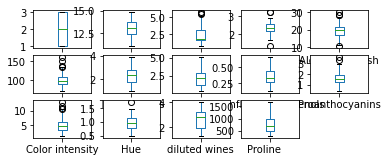

In [17]:
wine.plot(kind= 'box', subplots= True, layout=(5,5))

In [18]:
import scipy

In [19]:
from scipy import stats

In [20]:
from scipy.stats import zscore

Checking Outliers

In [21]:
import numpy as np

In [22]:
z=np.abs(zscore(wine))

In [23]:
threshold=3
print(np.where (z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7,  2, 10], dtype=int64))


In [24]:
z[25][3]

3.1197718608780005

In [25]:
wine_new=wine[(z<3).all(axis=1)]

In [26]:
wine_new

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Checking skewness

In [27]:
wine_new.skew()

Class                   0.117053
Alcohol                -0.028038
Malic acid              0.966253
Ash                    -0.250438
Alcalinity of ash       0.104774
Magnesium               0.566522
Total phenols           0.132108
Flavanoids             -0.077205
Nonflavanoid phenols    0.481810
Proanthocyanins         0.360217
Color intensity         0.732580
Hue                    -0.137430
diluted wines          -0.282514
Proline                 0.744773
dtype: float64

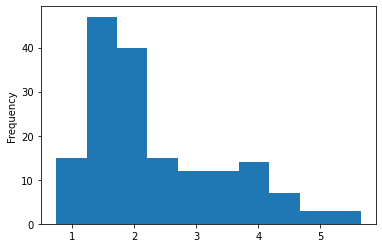

In [28]:
wine_new['Malic acid'].plot.hist()

In [29]:
from scipy.stats import boxcox

In [30]:
for col in wine_new.columns:
    if wine_new.skew().loc[col]>0.55:
        wine_new[col]=boxcox(wine_new[col],0)

In [31]:
wine_new.skew()

Class                   0.117053
Alcohol                -0.028038
Malic acid              0.231880
Ash                    -0.250438
Alcalinity of ash       0.104774
Magnesium               0.257350
Total phenols           0.132108
Flavanoids             -0.077205
Nonflavanoid phenols    0.481810
Proanthocyanins         0.360217
Color intensity        -0.165416
Hue                    -0.137430
diluted wines          -0.282514
Proline                 0.070763
dtype: float64

Change in skewness

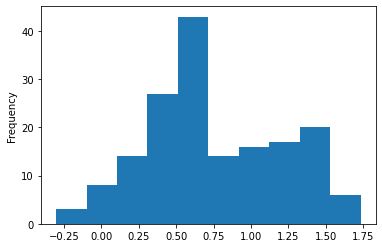

In [32]:
wine_new['Malic acid'].plot.hist()

In [33]:
wine_new

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,0.536493,2.43,15.6,4.844187,2.80,3.06,0.28,2.29,1.729884,1.04,3.92,6.970730
1,1,13.20,0.576613,2.14,11.2,4.605170,2.65,2.76,0.26,1.28,1.477049,1.05,3.40,6.956545
2,1,13.16,0.858662,2.67,18.6,4.615121,2.80,3.24,0.30,2.81,1.736951,1.03,3.17,7.077498
3,1,14.37,0.667829,2.50,16.8,4.727388,3.85,3.49,0.24,2.18,2.054124,0.86,3.45,7.299797
4,1,13.24,0.951658,2.87,21.0,4.770685,2.80,2.69,0.39,1.82,1.463255,1.04,2.93,6.599870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,1.731656,2.45,20.5,4.553877,1.68,0.61,0.52,1.06,2.041220,0.64,1.74,6.606650
174,3,13.40,1.363537,2.48,23.0,4.624973,1.80,0.75,0.43,1.41,1.987874,0.70,1.56,6.620073
175,3,13.27,1.453953,2.26,20.0,4.787492,1.59,0.69,0.43,1.35,2.322388,0.59,1.56,6.727432
176,3,13.17,0.951658,2.37,20.0,4.787492,1.65,0.68,0.53,1.46,2.230014,0.60,1.62,6.733402


In [34]:
x=wine_new.iloc[ : , 1:]

In [35]:
y=wine_new.iloc[ : , 0]

In [36]:
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,0.536493,2.43,15.6,4.844187,2.80,3.06,0.28,2.29,1.729884,1.04,3.92,6.970730
1,13.20,0.576613,2.14,11.2,4.605170,2.65,2.76,0.26,1.28,1.477049,1.05,3.40,6.956545
2,13.16,0.858662,2.67,18.6,4.615121,2.80,3.24,0.30,2.81,1.736951,1.03,3.17,7.077498
3,14.37,0.667829,2.50,16.8,4.727388,3.85,3.49,0.24,2.18,2.054124,0.86,3.45,7.299797
4,13.24,0.951658,2.87,21.0,4.770685,2.80,2.69,0.39,1.82,1.463255,1.04,2.93,6.599870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,1.731656,2.45,20.5,4.553877,1.68,0.61,0.52,1.06,2.041220,0.64,1.74,6.606650
174,13.40,1.363537,2.48,23.0,4.624973,1.80,0.75,0.43,1.41,1.987874,0.70,1.56,6.620073
175,13.27,1.453953,2.26,20.0,4.787492,1.59,0.69,0.43,1.35,2.322388,0.59,1.56,6.727432
176,13.17,0.951658,2.37,20.0,4.787492,1.65,0.68,0.53,1.46,2.230014,0.60,1.62,6.733402


In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 168, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
xs=sc.fit_transform(x)

In [41]:
xs=pd.DataFrame(xs,columns=x.columns)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xs_train,xs_test,y_train,y_test=train_test_split(xs,y,random_state=42,test_size=0.20)

In [44]:
model=[DecisionTreeClassifier(),SVC()]

In [45]:
for m in model:
    m.fit(xs_train,y_train)
    m.score(xs_train,y_train)
    predm=m.predict(xs_test)
    print("Accuracy score of", m ,"is :")
    print(accuracy_score(predm,y_test))
    
    

Accuracy score of DecisionTreeClassifier() is :
0.9411764705882353
Accuracy score of SVC() is :
1.0


In [46]:
for k in range (11):
    k_value=k+1
    knn=KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(xs_train,y_train)
    predk=knn.predict(xs_test)
    print(accuracy_score(predk,y_test),"at K-Value" , k_value)
   

0.9117647058823529 at K-Value 1
0.9117647058823529 at K-Value 2
0.9411764705882353 at K-Value 3
0.9117647058823529 at K-Value 4
0.9705882352941176 at K-Value 5
0.9705882352941176 at K-Value 6
0.9705882352941176 at K-Value 7
0.9705882352941176 at K-Value 8
0.9705882352941176 at K-Value 9
0.9705882352941176 at K-Value 10
0.9705882352941176 at K-Value 11


In [47]:
svc=SVC()
svc.fit(xs_train,y_train)
preds=svc.predict(xs_test)
print(accuracy_score(preds,y_test))
print(confusion_matrix(preds,y_test))
print(classification_report(preds,y_test))
print()

1.0
[[15  0  0]
 [ 0 12  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34




In [48]:
import pickle

In [49]:
file='picklesvcwine.pkl'

In [50]:
pickle.dump(svc,open(file,'wb'))